# Data Processing

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from get_stock_data_from_yfinance import pull_data_from_csv
from get_features_data import get_features_data
from get_labels_data import *
from simulate import *

In [3]:
from sklearn.decomposition import PCA, KernelPCA
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Get AAPL data features and labels
train_dates, train_vals = pull_data_from_csv("AAPL", "training_data")
train_data = get_features_data(train_vals)
num_train, num_feat = train_data.shape
train_labels_peak, _ = daily_peak_valley_labels(train_vals)
train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)
train_data[np.isnan(train_data)] = 0

test_dates, test_vals = pull_data_from_csv("AAPL", "test_data")
test_data = get_features_data(test_vals)
test_labels_peak, _ = daily_peak_valley_labels(test_vals)
test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
test_data[np.isnan(test_data)] = 0

comb_data = np.concatenate((train_data, test_data), axis=0)
pca = PCA(n_components=int(num_feat/2))
comb_data_pca = pca.fit_transform(comb_data)
train_data_pca = comb_data_pca[:num_train,:]
test_data_pca = comb_data_pca[num_train:,:]
kpca = KernelPCA(n_components=int(num_feat/2))
comb_data_kpca = kpca.fit_transform(comb_data)
train_data_kpca = comb_data_kpca[:num_train,:]
test_data_kpca = comb_data_kpca[num_train:,:]
# print(np.sum(train_labels_MA15==-1))
# print(np.sum(train_labels_MA15==0))
# print(np.sum(train_labels_MA15==1))
# print(np.sum(train_labels_peak==-1))
# print(np.sum(train_labels_peak==0))
# print(np.sum(train_labels_peak==1))

# Naive Bayes

AAPL Peak Valley Accuracy 0.5310344827586206
Final Balance Peak Valley:  1.2388783852693122


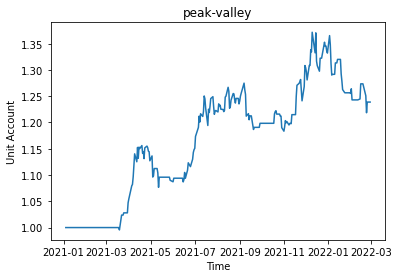

AAPL MA15 Accuracy 0.7275862068965517
Final Balance MA15:  1.0920465718231007


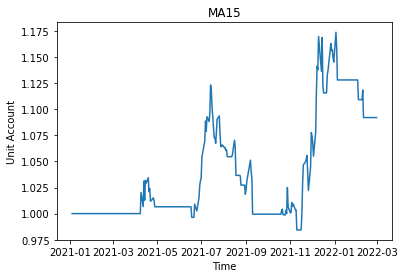

In [4]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
gnb_peak = GaussianNB()
model_peak = gnb_peak.fit(train_data, train_labels_peak)
preds_peak = gnb_peak.predict(test_data)
print("AAPL Peak Valley Accuracy", metrics.accuracy_score(test_labels_peak, preds_peak))
acct_peak = simulate(test_vals, preds_peak)
print("Final Balance Peak Valley: ", acct_peak[-1])
plot_account(test_dates, acct_peak, "peak-valley")
gnb_MA15 = GaussianNB()
model_MA15 = gnb_MA15.fit(train_data, train_labels_MA15)
preds_MA15 = gnb_MA15.predict(test_data)
print("AAPL MA15 Accuracy", metrics.accuracy_score(test_labels_MA15, preds_MA15))
acct_MA15 = simulate(test_vals, preds_MA15)
print("Final Balance MA15: ", acct_MA15[-1])
plot_account(test_dates, acct_MA15, "MA15")

AAPL Peak Valley Accuracy 0.5275862068965518
Final Balance Peak Valley:  1.3042607394061716


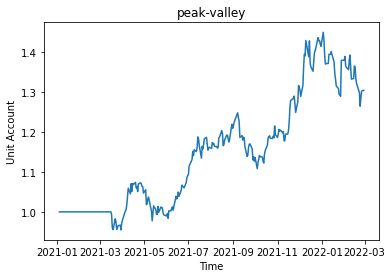

AAPL MA15 Accuracy 0.5758620689655173
Final Balance MA15:  1.1279922062283705


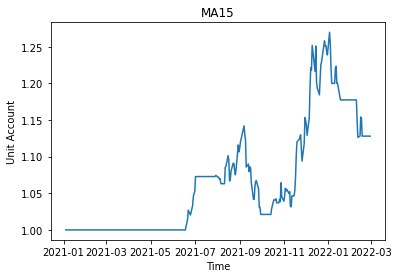

In [5]:
# PCA Data
gnb_peak = GaussianNB()
model_peak = gnb_peak.fit(train_data_pca, train_labels_peak)
preds_peak = gnb_peak.predict(test_data_pca)
print("AAPL Peak Valley Accuracy", metrics.accuracy_score(test_labels_peak, preds_peak))
acct_peak = simulate(test_vals, preds_peak)
print("Final Balance Peak Valley: ", acct_peak[-1])
plot_account(test_dates, acct_peak, "peak-valley")
gnb_MA15 = GaussianNB()
model_MA15 = gnb_MA15.fit(train_data_pca, train_labels_MA15)
preds_MA15 = gnb_MA15.predict(test_data_pca)
print("AAPL MA15 Accuracy", metrics.accuracy_score(test_labels_MA15, preds_MA15))
acct_MA15 = simulate(test_vals, preds_MA15)
print("Final Balance MA15: ", acct_MA15[-1])
plot_account(test_dates, acct_MA15, "MA15")

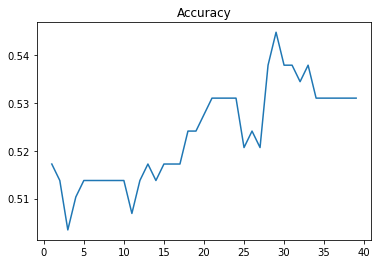

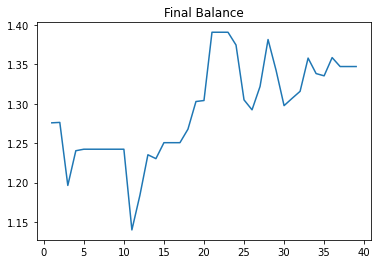

0.5448275862068965
28
1.342662223167424
1.3909350547214492


In [6]:
comp_list = list(range(1, num_feat))
accs = []
final_bal = []
for i in comp_list:
    pca = PCA(n_components=i)
    comb_data_pca = pca.fit_transform(comb_data)
    train_data_pca = comb_data_pca[:num_train,:]
    test_data_pca = comb_data_pca[num_train:,:]
    gnb_peak = GaussianNB()
    model_peak = gnb_peak.fit(train_data_pca, train_labels_peak)
    preds_peak = gnb_peak.predict(test_data_pca)
    acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
    acct_peak = simulate(test_vals, preds_peak)
    accs.append(acc_peak)
    final_bal.append(acct_peak[-1])
plt.plot(comp_list, accs)
plt.title("Accuracy")
plt.show()
plt.plot(comp_list, final_bal)
plt.title("Final Balance")
plt.show()
print(np.max(accs))
print(np.argmax(accs))
print(final_bal[np.argmax(accs)])
print(np.max(final_bal))

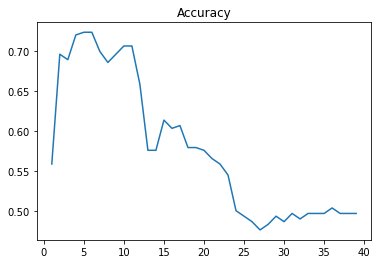

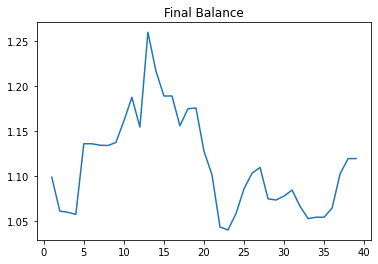

0.7241379310344828
4
1.1362508383323067
1.259937601130743


In [7]:
comp_list = list(range(1, num_feat))
accs = []
final_bal = []
for i in comp_list:
    pca = PCA(n_components=i)
    comb_data_pca = pca.fit_transform(comb_data)
    train_data_pca = comb_data_pca[:num_train,:]
    test_data_pca = comb_data_pca[num_train:,:]
    gnb_MA15 = GaussianNB()
    model_MA15 = gnb_MA15.fit(train_data_pca, train_labels_MA15)
    preds_MA15 = gnb_MA15.predict(test_data_pca)
    acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
    acct_MA15 = simulate(test_vals, preds_MA15)
    accs.append(acc_MA15)
    final_bal.append(acct_MA15[-1])
plt.plot(comp_list, accs)
plt.title("Accuracy")
plt.show()
plt.plot(comp_list, final_bal)
plt.title("Final Balance")
plt.show()
print(np.max(accs))
print(np.argmax(accs))
print(final_bal[np.argmax(accs)])
print(np.max(final_bal))

AAPL Peak Valley Accuracy 0.5275862068965518
Final Balance Peak Valley:  1.3042607394061716


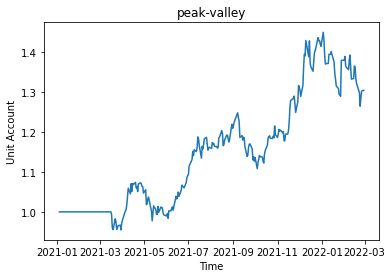

AAPL MA15 Accuracy 0.5758620689655173
Final Balance MA15:  1.1279922062283705


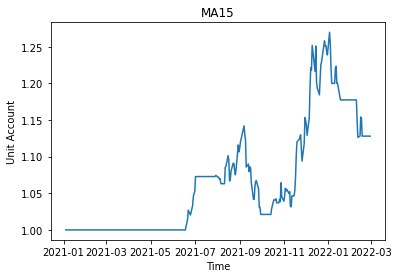

In [8]:
# kPCA Data
gnb_peak = GaussianNB()
model_peak = gnb_peak.fit(train_data_kpca, train_labels_peak)
preds_peak = gnb_peak.predict(test_data_kpca)
print("AAPL Peak Valley Accuracy", metrics.accuracy_score(test_labels_peak, preds_peak))
acct_peak = simulate(test_vals, preds_peak)
print("Final Balance Peak Valley: ", acct_peak[-1])
plot_account(test_dates, acct_peak, "peak-valley")
gnb_MA15 = GaussianNB()
model_MA15 = gnb_MA15.fit(train_data_kpca, train_labels_MA15)
preds_MA15 = gnb_MA15.predict(test_data_kpca)
print("AAPL MA15 Accuracy", metrics.accuracy_score(test_labels_MA15, preds_MA15))
acct_MA15 = simulate(test_vals, preds_MA15)
print("Final Balance MA15: ", acct_MA15[-1])
plot_account(test_dates, acct_MA15, "MA15")

AAPL Peak Valley Accuracy 0.5310344827586206
Final Balance Peak Valley:  1.2840371497813903


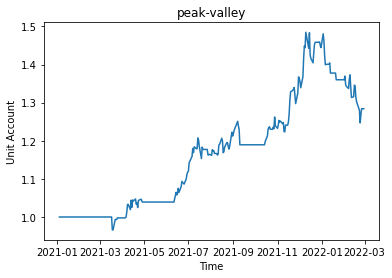

AAPL MA15 Accuracy 0.6448275862068965
Final Balance MA15:  1.1227908863839635


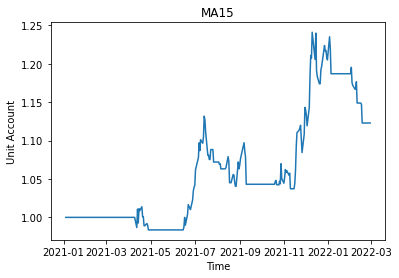

In [9]:
from sklearn.naive_bayes import BernoulliNB
bnb_peak = BernoulliNB()
model_peak = bnb_peak.fit(train_data, train_labels_peak)
preds_peak = bnb_peak.predict(test_data)
print("AAPL Peak Valley Accuracy", metrics.accuracy_score(test_labels_peak, preds_peak))
acct_peak = simulate(test_vals, preds_peak)
print("Final Balance Peak Valley: ", acct_peak[-1])
plot_account(test_dates, acct_peak, "peak-valley")
bnb_MA15 = BernoulliNB()
model_MA15 = bnb_MA15.fit(train_data, train_labels_MA15)
preds_MA15 = bnb_MA15.predict(test_data)
print("AAPL MA15 Accuracy", metrics.accuracy_score(test_labels_MA15, preds_MA15))
acct_MA15 = simulate(test_vals, preds_MA15)
print("Final Balance MA15: ", acct_MA15[-1])
plot_account(test_dates, acct_MA15, "MA15")

In [10]:
import glob
csvs = glob.glob('stock_data/training_data/*.csv')
symbols = []
accuracy = np.zeros((len(csvs), 2))
final_bal = np.zeros((len(csvs), 2))
acc_peak_cnt = 0
acc_MA15_cnt = 0
acct_peak_cnt = 0
acct_MA15_cnt = 0
ind = 0
for csv in csvs:
  symbol = csv[csv.rindex('\\') + 1:-4]
  # Get stock training data features and labels
  train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
  train_data = get_features_data(train_vals)
  train_labels_peak, _ = daily_peak_valley_labels(train_vals)
  train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)

  train_data[np.isnan(train_data)] = 0
  # Get stock test data features and labels
  test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
  test_data = get_features_data(test_vals)
  test_labels_peak, _ = daily_peak_valley_labels(test_vals)
  test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
  test_data[np.isnan(test_data)] = 0

  # Train with Gaussian NB
  gnb_peak = GaussianNB()
  model_peak = gnb_peak.fit(train_data, train_labels_peak)
  preds_peak = gnb_peak.predict(test_data)
  acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
  print(symbol, " Peak Valley Accuracy:", acc_peak)
  acct_peak = simulate(test_vals, preds_peak)
  print(symbol, "Peak Valley Final Balance: ", acct_peak[-1])

  gnb_MA15 = GaussianNB()
  model_MA15 = gnb_MA15.fit(train_data, train_labels_MA15)
  preds_MA15 = gnb_MA15.predict(test_data)
  acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
  print(symbol, " MA15 Accuracy:", acc_MA15)
  acct_MA15 = simulate(test_vals, preds_MA15)
  print(symbol, "MA15 Final Balance: ", acct_MA15[-1])

  symbols.append(symbol)
  accuracy[ind,0] = acc_peak
  accuracy[ind,1] = acc_MA15
  final_bal[ind, 0] = acct_peak[-1]
  final_bal[ind, 1] = acct_MA15[-1]
  ind += 1
  acc_peak_cnt += acc_peak > acc_MA15
  acc_MA15_cnt += acc_MA15 > acc_peak
  acct_peak_cnt += acct_peak[-1] > acct_MA15[-1]
  acct_MA15_cnt += acct_MA15[-1] > acct_peak[-1]
print("Higher Peak Accuracy Count: ", acc_peak_cnt)
print("Higher MA15 Accuracy Count: ", acc_MA15_cnt)
print("Higher Peak Final Balance Count: ", acct_peak_cnt)
print("Higher MA15 Final Balance Count: ", acct_MA15_cnt)
print("Avg Accuracy: [Peak, MA15] = ", np.mean(accuracy, axis=0))
print("Avg Final Balance: [Peak, MA15] = ", np.mean(final_bal, axis=0))
  

AAPL  Peak Valley Accuracy: 0.5310344827586206
AAPL Peak Valley Final Balance:  1.2388783852693122
AAPL  MA15 Accuracy: 0.7275862068965517
AAPL MA15 Final Balance:  1.0920465718231007
ABBV  Peak Valley Accuracy: 0.4724137931034483
ABBV Peak Valley Final Balance:  1.128866264788792
ABBV  MA15 Accuracy: 0.696551724137931
ABBV MA15 Final Balance:  1.1036804502073716
ABT  Peak Valley Accuracy: 0.506896551724138
ABT Peak Valley Final Balance:  1.1073962477286725
ABT  MA15 Accuracy: 0.7448275862068966
ABT MA15 Final Balance:  1.0285175319872029
ACN  Peak Valley Accuracy: 0.4793103448275862
ACN Peak Valley Final Balance:  0.9163892518900656
ACN  MA15 Accuracy: 0.7310344827586207
ACN MA15 Final Balance:  1.358325743172403
ADBE  Peak Valley Accuracy: 0.4724137931034483
ADBE Peak Valley Final Balance:  0.8306042358039472
ADBE  MA15 Accuracy: 0.7965517241379311
ADBE MA15 Final Balance:  1.274099508877825
AMZN  Peak Valley Accuracy: 0.5137931034482759
AMZN Peak Valley Final Balance:  1.01059222475

In [12]:
import glob
csvs = glob.glob('stock_data/training_data/*.csv')
symbols = []
accuracy = np.zeros((len(csvs), 2))
final_bal = np.zeros((len(csvs), 2))
acc_peak_cnt = 0
acc_MA15_cnt = 0
acct_peak_cnt = 0
acct_MA15_cnt = 0
ind = 0
for csv in csvs:
  symbol = csv[csv.rindex('\\') + 1:-4]
  # Get stock training data features and labels
  train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
  train_data = get_features_data(train_vals)
  train_labels_peak, _ = daily_peak_valley_labels(train_vals)
  train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)

  train_data[np.isnan(train_data)] = 0
  # Get stock test data features and labels
  test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
  test_data = get_features_data(test_vals)
  test_labels_peak, _ = daily_peak_valley_labels(test_vals)
  test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
  test_data[np.isnan(test_data)] = 0

  # Train with Bernoulli NB
  bnb_peak = BernoulliNB()
  model_peak = bnb_peak.fit(train_data, train_labels_peak)
  preds_peak = bnb_peak.predict(test_data)
  acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
  print(symbol, "Peak Valley Accuracy:", acc_peak)
  acct_peak = simulate(test_vals, preds_peak)
  print(symbol, "Peak Valley Final Balance: ", acct_peak[-1])

  bnb_MA15 = BernoulliNB()
  model_MA15 = bnb_MA15.fit(train_data, train_labels_MA15)
  preds_MA15 = bnb_MA15.predict(test_data)
  acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
  print(symbol, "MA15 Accuracy:", acc_MA15)
  acct_MA15 = simulate(test_vals, preds_MA15)
  print(symbol, "MA15 Final Balance: ", acct_MA15[-1])
  
  symbols.append(symbol)
  accuracy[ind,0] = acc_peak
  accuracy[ind,1] = acc_MA15
  final_bal[ind, 0] = acct_peak[-1]
  final_bal[ind, 1] = acct_MA15[-1]
  ind += 1
  acc_peak_cnt += acc_peak > acc_MA15
  acc_MA15_cnt += acc_MA15 > acc_peak
  acct_peak_cnt += acct_peak[-1] > acct_MA15[-1]
  acct_MA15_cnt += acct_MA15[-1] > acct_peak[-1]
print("Higher Peak Accuracy Count: ", acc_peak_cnt)
print("Higher MA15 Accuracy Count: ", acc_MA15_cnt)
print("Higher Peak Final Balance Count: ", acct_peak_cnt)
print("Higher MA15 Final Balance Count: ", acct_MA15_cnt)
print("Avg Accuracy: [Peak, MA15] = ", np.mean(accuracy, axis=0))
print("Avg Final Balance: [Peak, MA15] = ", np.mean(final_bal, axis=0))
  

AAPL Peak Valley Accuracy: 0.5310344827586206
AAPL Peak Valley Final Balance:  1.2840371497813903
AAPL MA15 Accuracy: 0.6448275862068965
AAPL MA15 Final Balance:  1.1227908863839635
ABBV Peak Valley Accuracy: 0.496551724137931
ABBV Peak Valley Final Balance:  1.195745369531163
ABBV MA15 Accuracy: 0.6620689655172414
ABBV MA15 Final Balance:  1.1939361298407223
ABT Peak Valley Accuracy: 0.5103448275862069
ABT Peak Valley Final Balance:  1.0128629736823993
ABT MA15 Accuracy: 0.696551724137931
ABT MA15 Final Balance:  1.0418112336186687
ACN Peak Valley Accuracy: 0.496551724137931
ACN Peak Valley Final Balance:  0.9661627240348151
ACN MA15 Accuracy: 0.696551724137931
ACN MA15 Final Balance:  1.3993298532332632
ADBE Peak Valley Accuracy: 0.4862068965517241
ADBE Peak Valley Final Balance:  0.8291424112800537
ADBE MA15 Accuracy: 0.7758620689655172
ADBE MA15 Final Balance:  1.1930544667192042
AMZN Peak Valley Accuracy: 0.5
AMZN Peak Valley Final Balance:  1.0096400783907213
AMZN MA15 Accuracy: 

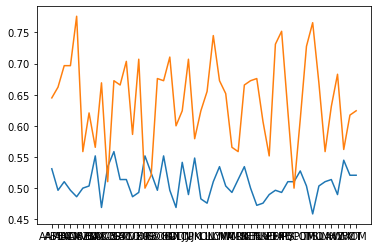

In [21]:
plt.plot(symbols, accuracy[:,0], label='Peak')
plt.plot(symbols, accuracy[:,1], label='MA15')

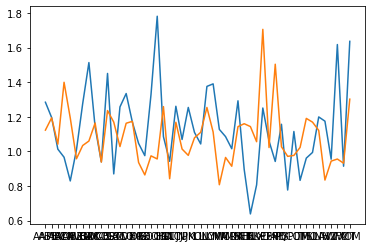

In [22]:
plt.plot(symbols, final_bal[:,0], label='Peak')
plt.plot(symbols, final_bal[:,1], label='MA15')

# SVM